# 🍕 Proyecto Final – Análisis de Ventas de Pizzas

# De Cero a Python
## Alumno: César Geovanni Machuca Pereida

Bienvenidos al **proyecto final** del curso.  
En esta actividad pondrás en práctica todo lo aprendido en las clases, aplicando tus conocimientos de **Python, análisis de datos y visualización**.

## 🎯 Objetivo
El objetivo de este proyecto es **analizar un conjunto de datos de ventas de pizzas**, identificar patrones, responder preguntas de negocio y presentar conclusiones basadas en la información.

## 🛠️ Lo que haremos
A lo largo de este notebook realizaremos los siguientes pasos:
1. **Cargar y explorar los datos** para conocer su estructura.  
2. **Limpiar los datos** corrigiendo valores nulos y errores.  
3. **Analizar la información** mediante operaciones con Pandas.  
4. **Responder preguntas clave**, por ejemplo:  
   - ¿Cuáles son las pizzas más vendidas?  
   - ¿Qué días de la semana tienen más ventas?  
   - ¿Cuál es el ingreso total generado?  
5. **Visualizar los resultados** con gráficos para comunicar hallazgos de forma clara.  

Al finalizar, tendrás un **informe de análisis completo**, similar a los que un ingeniero de datos o analista elaboraría en un proyecto real.


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Cargar datos

In [22]:
# 1. Importa la librería pandas con el alias pd
import pandas as pd

# 2. Importa la librería matplotlib.pyplot con el alias plt
import matplotlib.pyplot as plt

# 4. Importa la librería drive
from google.colab import drive

# 5. Importa la librería datetime
import datetime

# 5. Lee el archivo "ventas_pizzas.csv" y guárdalo en una variable
ruta_archivo = "/content/drive/MyDrive/Colab Notebooks/ventas_pizzas_proyecto.csv"
df_ventas = pd.read_csv(ruta_archivo)

# 6. Muestra una vista previa del DataFrame usando un método que te muestre las primeras filas
df_ventas.head()


,empleado,Apellido,sabor,dia,precio_unitario,cantidad
0,Carlos,Guzman,Mexicana,Domingo,NaN,3.0
1,Marta,Juarez,Hawaiana,Martes,160.0,3.0
2,Luis,Fuentes,Mexicana,Martes,150.0,4.0
3,Carlos,Guzman,Queso,Jueves,120.0,2.0
4,Carlos,Guzman,Mexicana,Martes,150.0,2.0


## 2. Limpieza de datos

## Ver cuántos valores nulos hay

In [23]:
# Ver cuántos valores nulos hay
print(df_ventas.isnull().sum())


empleado           0
Apellido           0
sabor              0
dia                0
precio_unitario    4
cantidad           3
dtype: int64


In [24]:
# Rellenar valores faltantes con ayuda de fillna de precio_unitario y cantidad y
# agrega el promedio de los precio y la mediana respectivamente
mean_precio = df_ventas['precio_unitario'].mean()
median_cantidad = df_ventas['cantidad'].median()

# Calcular la media de 'precio_unitario' y la mediana de 'cantidad'
mean_precio = df_ventas['precio_unitario'].mean()
median_cantidad = df_ventas['cantidad'].median()

# Mostrar los valores a imputar
print(f"\nMedia para 'precio_unitario': {mean_precio:.2f}")
print(f"Mediana para 'cantidad': {median_cantidad:.0f}")

# 2. Rellenar valores faltantes con fillna
# Rellenar 'precio_unitario' con la media
df_ventas['precio_unitario'].fillna(mean_precio, inplace=True)
# Rellenar 'cantidad' con la mediana
df_ventas['cantidad'].fillna(median_cantidad, inplace=True)

# 3. Confirmar que ya no hay nulos
print("\nConteo final de valores nulos después de la imputación:")
print(df_ventas.isnull().sum())

# Vista previa para verificar la imputación
print("\nPrimeras filas del DataFrame después de la imputación (para verificar):")
print(df_ventas.head())



Media para 'precio_unitario': 142.61
Mediana para 'cantidad': 2

Conteo final de valores nulos después de la imputación:
empleado           0
Apellido           0
sabor              0
dia                0
precio_unitario    0
cantidad           0
dtype: int64

Primeras filas del DataFrame después de la imputación (para verificar):
  empleado Apellido     sabor      dia  precio_unitario  cantidad
0   Carlos   Guzman  Mexicana  Domingo       142.608696       3.0
1    Marta   Juarez  Hawaiana   Martes       160.000000       3.0
2     Luis  Fuentes  Mexicana   Martes       150.000000       4.0
3   Carlos   Guzman     Queso   Jueves       120.000000       2.0
4   Carlos   Guzman  Mexicana   Martes       150.000000       2.0


/tmp/ipython-input-3597795527.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ventas['precio_unitario'].fillna(mean_precio, inplace=True)
/tmp/ipython-input-3597795527.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

# 3. Crear columna 'total_venta'

In [25]:
# 5. Crea una nueva columna llamada "total_venta" que se calcule multiplicando
#    la columna "precio_unitario" por la columna "cantidad"

# Crea la nueva columna "total_venta"
df_ventas['total_venta'] = df_ventas['precio_unitario'] * df_ventas['cantidad']

# Mostrar las primeras filas para verificar
df_ventas.head()


,empleado,Apellido,sabor,dia,precio_unitario,cantidad,total_venta
0,Carlos,Guzman,Mexicana,Domingo,142.608696,3.0,427.826087
1,Marta,Juarez,Hawaiana,Martes,160.000000,3.0,480.000000
2,Luis,Fuentes,Mexicana,Martes,150.000000,4.0,600.000000
3,Carlos,Guzman,Queso,Jueves,120.000000,2.0,240.000000
4,Carlos,Guzman,Mexicana,Martes,150.000000,2.0,300.000000


In [26]:
# 6. Muestra nuevamente las primeras filas del DataFrame para verificar que se haya creado correctamente la nueva columna
df_ventas.head(10)

,empleado,Apellido,sabor,dia,precio_unitario,cantidad,total_venta
0,Carlos,Guzman,Mexicana,Domingo,142.608696,3.0,427.826087
1,Marta,Juarez,Hawaiana,Martes,160.000000,3.0,480.000000
2,Luis,Fuentes,Mexicana,Martes,150.000000,4.0,600.000000
3,Carlos,Guzman,Queso,Jueves,120.000000,2.0,240.000000
4,Carlos,Guzman,Mexicana,Martes,150.000000,2.0,300.000000
5,Marta,Juarez,Queso,Martes,160.000000,1.0,160.000000
6,Luis,Fuentes,Queso,Sábado,160.000000,2.0,320.000000
7,Luis,Fuentes,Peperoni,Jueves,150.000000,3.0,450.000000
8,Carlos,Guzman,Mexicana,Sábado,120.000000,2.0,240.000000
9,Ana,Del Rio,Peperoni,Domingo,150.000000,1.0,150.000000


# 4. Empleado que más vendió

In [27]:
# 7. Agrupa el DataFrame por la columna "empleado"
df_agrupado_empleado = df_ventas.groupby('empleado')
# Muestra el tamaño de cada grupo para verificar la agrupación
conteo_por_empleado = df_agrupado_empleado.size()
print(conteo_por_empleado)


empleado
Ana       11
Carlos    13
Luis      10
Marta     16
dtype: int64


In [28]:
# 8. Sobre cada grupo, calcula la suma de la columna "total_venta"
ventas_por_empleado = df_ventas.groupby('empleado')['total_venta'].sum().reset_index()
print(ventas_por_empleado)


  empleado  total_venta
0      Ana  4550.000000
1   Carlos  4863.043478
2     Luis  4760.000000
3    Marta  5038.260870


In [29]:
# 9. Ordena los resultados de mayor a menor (ventas más altas primero) sort_values()
ventas_por_empleado_ordenado = ventas_por_empleado.sort_values(by='total_venta', ascending=False)

# 10. print("Ventas totales por Empleado ordenadas de Mayor a Menor:")
print(ventas_por_empleado_ordenado)

  empleado  total_venta
3    Marta  5038.260870
1   Carlos  4863.043478
2     Luis  4760.000000
0      Ana  4550.000000


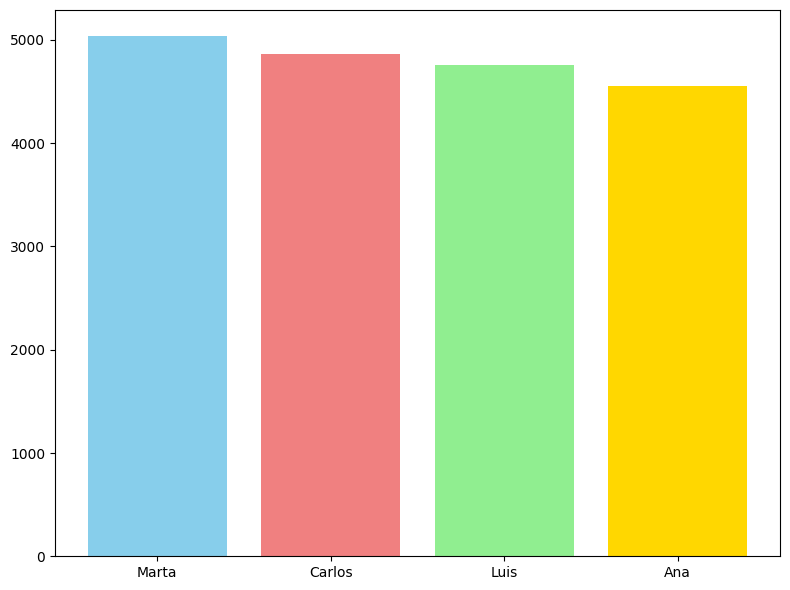

In [30]:
# 11. Crea una gráfica de barras usando los datos de ventas por empleado

# Creación de la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(ventas_por_empleado_ordenado['empleado'],
        ventas_por_empleado_ordenado['total_venta'],
        color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

plt.tight_layout()
plt.savefig('ventas_por_empleado_bar_chart.png')


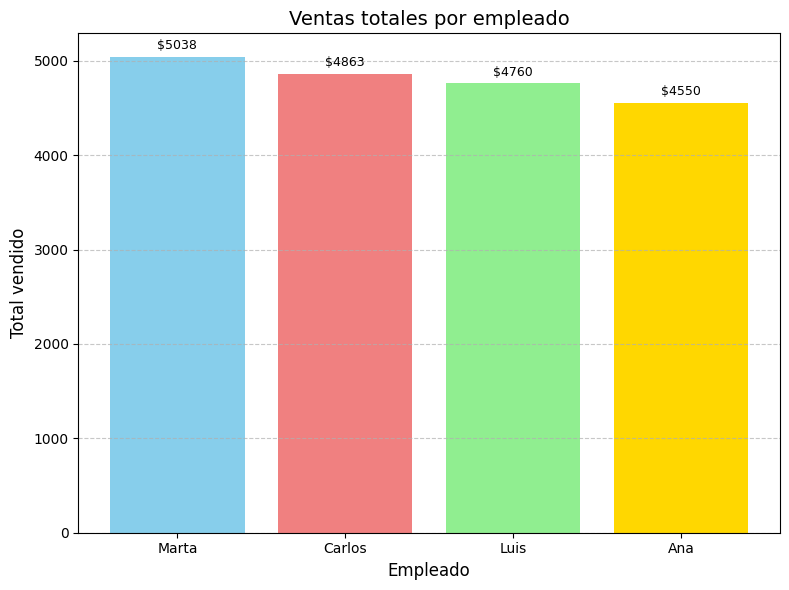

In [31]:
# Puntos 12, 13, 14, 15 con la grafica con formato.

# Creación de la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(ventas_por_empleado_ordenado['empleado'],
        ventas_por_empleado_ordenado['total_venta'],
        color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Añadir etiquetas de valor
for index, value in enumerate(ventas_por_empleado_ordenado['total_venta']):
    plt.text(index, value + 50, f'${value:.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('ventas_por_empleado_bar_chart.png')

# 12. Asigna un título a la gráfica (por ejemplo: "Ventas totales por empleado")
plt.title('Ventas totales por empleado', fontsize=14)

# 13. Agrega etiquetas al eje Y ("Total vendido") y al eje X ("Empleado")
plt.xlabel('Empleado', fontsize=12)
plt.ylabel('Total vendido', fontsize=12)

# 14. Ajusta la rotación de las etiquetas del eje X para que se vean correctamente (por ejemplo: 0 grados)
plt.xticks(rotation=0)         # Prueba como se ve sin y con xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 15. Muestra la gráfica en pantalla
plt.tight_layout()
plt.savefig('ventas_por_empleado_bar_chart_final.png')

# 5. Sabor más vendido (por cantidad)

In [32]:
# 16. Agrupa el DataFrame por la columna "sabor"
ventas_por_sabor = df_ventas.groupby('sabor').agg({
    'cantidad': 'sum',
    'total_venta': 'sum'
}).reset_index()

# 17. Para cada tipo de sabor, calcula la suma total de la columna "cantidad" (cuántas pizzas se vendieron de cada sabor)
cantidad_por_sabor = df_ventas.groupby('sabor')['cantidad'].sum().reset_index()

# 18. Ordena los resultados de mayor a menor
cantidad_por_sabor = cantidad_por_sabor.sort_values(by='cantidad', ascending=False)

# 19. Imprime el resultado para ver qué sabor de pizza fue el más vendido
print(cantidad_por_sabor)

      sabor  cantidad
0  Hawaiana      43.0
1  Mexicana      32.0
2  Peperoni      30.0
3     Queso      30.0


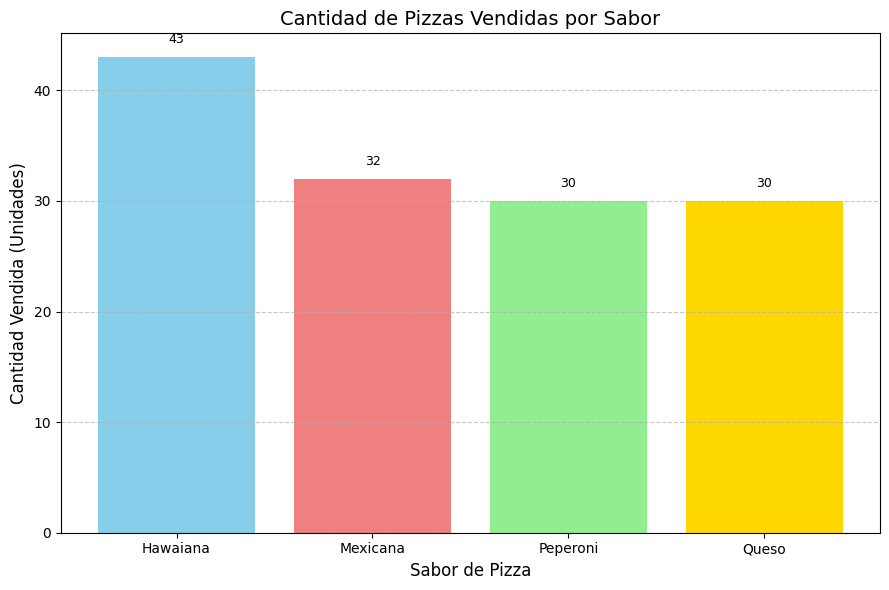

In [33]:
# 20. Crea una gráfica de barras usando los datos de ventas por sabor
plt.figure(figsize=(9, 6))

plt.bar(cantidad_por_sabor['sabor'],
        cantidad_por_sabor['cantidad'],
# 21. Asigna un color a las barras (por ejemplo, "orange")
 color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
# 22. Agrega un título a la gráfica (por ejemplo: "Cantidad vendida por sabor")
plt.title('Cantidad de Pizzas Vendidas por Sabor', fontsize=14)
# 23. Agrega etiquetas a los ejes: eje Y ("Cantidad total") y eje X ("Sabor")
plt.xlabel('Sabor de Pizza', fontsize=12)
plt.ylabel('Cantidad Vendida (Unidades)', fontsize=12)

# Añadir etiquetas de valor
for index, value in enumerate(cantidad_por_sabor['cantidad']):
    plt.text(index, value + 1, f'{value:.0f}', ha='center', va='bottom', fontsize=9)

# 24. Rota las etiquetas del eje X para que se lean mejor (por ejemplo, 45 grados)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# 25. Muestra la gráfica en pantalla
plt.tight_layout()
plt.savefig('cantidad_por_sabor_bar_chart.png')

# 6. Día con más ventas

In [34]:
# 26. Agrupa el DataFrame por la columna "dia" (día de la semana)
df_agrupado_dia = df_ventas.groupby('dia')

# Muestra el tamaño de cada grupo (conteo de registros)
conteo_por_dia = df_agrupado_dia.size().reset_index(name='conteo_registros')
print(conteo_por_dia)
print("\n")

# 27. Para cada día, calcula la suma total de la columna "total_venta"
# primero verificamos que exista la columna "total_venta" ya que ha marcado
# error diciendo que dicha columna no existe.
columna_a_verificar = 'total_venta'

if columna_a_verificar in df_ventas.columns:
    print(f"Columna '{columna_a_verificar}' existe. Procediendo con el cálculo...")
    ventas_por_dia_sin_ordenar = df_ventas.groupby('dia')['total_venta'].sum().reset_index()
    print("\nSuma total de ventas por Día (sin ordenar):")
    print(ventas_por_dia_sin_ordenar)
    print("\n\n")
else:
    print(f"Columna '{columna_a_verificar}' no existe. No se pudo realizar el cálculo")

# 28. Ordena los resultados de mayor a menor (para ver en qué día se vendió más)
ventas_por_dia_ordenado = ventas_por_dia_sin_ordenar.sort_values(by='total_venta', ascending=False)

# 29. Imprime el resultado para revisar las ventas por día
print("29. Ventas por Día Ordenadas (De Mayor a Menor):")
print(ventas_por_dia_ordenado)


         dia  conteo_registros
0    Domingo                 9
1     Jueves                 7
2      Lunes                10
3     Martes                 8
4  Miércoles                 5
5     Sábado                 4
6    Viernes                 7


Columna 'total_venta' existe. Procediendo con el cálculo...

Suma total de ventas por Día (sin ordenar):
         dia  total_venta
0    Domingo  2933.043478
1     Jueves  2610.000000
2      Lunes  4363.043478
3     Martes  3310.000000
4  Miércoles  2480.000000
5     Sábado  1085.217391
6    Viernes  2430.000000



29. Ventas por Día Ordenadas (De Mayor a Menor):
         dia  total_venta
2      Lunes  4363.043478
3     Martes  3310.000000
0    Domingo  2933.043478
1     Jueves  2610.000000
4  Miércoles  2480.000000
6    Viernes  2430.000000
5     Sábado  1085.217391


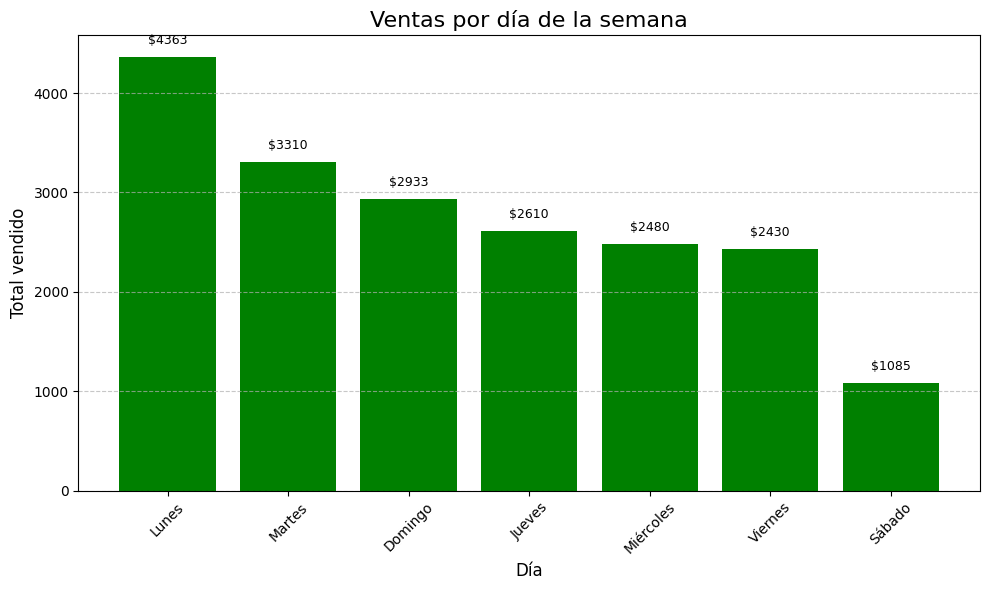

In [35]:
# 30. Crea una gráfica de barras usando los datos de ventas por día de la semana
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_dia_ordenado['dia'],
        ventas_por_dia_ordenado['total_venta'])

# 31. Cambia el color de las barras (por ejemplo, a "green")
plt.bar(ventas_por_dia_ordenado['dia'],
        ventas_por_dia_ordenado['total_venta'],
        color="green")

# 32. Asigna un título a la gráfica (por ejemplo: "Ventas por día de la semana")
plt.title('Ventas por día de la semana', fontsize=16)

# 33. Agrega etiquetas a los ejes: eje Y ("Total vendido") y eje X ("Día")
plt.xlabel('Día', fontsize=12)
plt.ylabel('Total vendido', fontsize=12)

# Añadir etiquetas de valor
for index, value in enumerate(ventas_por_dia_ordenado['total_venta']):
    plt.text(index, value + 100, f'${value:.0f}', ha='center', va='bottom', fontsize=9)

# 34. Rota las etiquetas del eje X para que se lean mejor (por ejemplo, 45 grados)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 35. Muestra la gráfica en pantalla
plt.tight_layout()
plt.savefig('ventas_por_dia_bar_chart.png')

#7. Sumar columnas

In [36]:
# Crea una nueva columna que una los nombres y apellidos y llamala nombre completo
df_ventas['nombre completo'] = df_ventas['empleado'] + ' ' + df_ventas['Apellido']
print("Primeras 10 filas del DataFrame con la nueva columna 'nombre completo':")
print("\n")
print(df_ventas.head(10))

# Seleccionamos las columnas en el orden solicitado: nombre_completo, total_venta
columnas_seleccionadas = df_ventas[['nombre completo', 'total_venta']]

# Imprimimos las primeras filas para una vista previa
print("\n")
print("Columnas 'nombre completo' y 'total_venta':")
print(columnas_seleccionadas.head(10))

# Quiero mostrar la información de una manera más adecuada.
# Agrupamos por 'nombre completo' y calcular la suma total de ventas.
ventas_por_nombre_completo = df_ventas.groupby('nombre completo')['total_venta'].sum().reset_index()

# Ordenamos los resultados de mayor a menor para organizar la información.
ventas_por_nombre_completo_ordenado = ventas_por_nombre_completo.sort_values(by='total_venta', ascending=False)

# Imprimimos el resultado organizado
print("\n")
print("Información agrupada por nombre del empleado:")
print(ventas_por_nombre_completo_ordenado)

Primeras 10 filas del DataFrame con la nueva columna 'nombre completo':


  empleado Apellido     sabor      dia  precio_unitario  cantidad  \
0   Carlos   Guzman  Mexicana  Domingo       142.608696       3.0   
1    Marta   Juarez  Hawaiana   Martes       160.000000       3.0   
2     Luis  Fuentes  Mexicana   Martes       150.000000       4.0   
3   Carlos   Guzman     Queso   Jueves       120.000000       2.0   
4   Carlos   Guzman  Mexicana   Martes       150.000000       2.0   
5    Marta   Juarez     Queso   Martes       160.000000       1.0   
6     Luis  Fuentes     Queso   Sábado       160.000000       2.0   
7     Luis  Fuentes  Peperoni   Jueves       150.000000       3.0   
8   Carlos   Guzman  Mexicana   Sábado       120.000000       2.0   
9      Ana  Del Rio  Peperoni  Domingo       150.000000       1.0   

   total_venta nombre completo  
0   427.826087   Carlos Guzman  
1   480.000000    Marta Juarez  
2   600.000000    Luis Fuentes  
3   240.000000   Carlos Guzman  
4

# 8. Guarda tu nuevo archivo

In [37]:
#Crea una variable con el nombre de tu archivo en formato de texto y agregale timestamp f{fecha_hora}
#Obtenemos el timestamp actual en formato AAAA_MM_DD_HH_MM_SS
fecha_hora = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Creamos el nombre base del archivo de salida
nombre_base = "ventas_pizzas_analizadas"

# Creamos la variable con el nombre del archivo y el timestamp usando un f-string
nombre_archivo_salida = f"{nombre_base}_{fecha_hora}.csv"

print(f"La variable 'nombre_archivo_salida' ha sido creada con el valor:\n{nombre_archivo_salida}")

# Guarda tu archivo en la misma ruta
df_ventas.to_csv(nombre_archivo_salida, index=False)

La variable 'nombre_archivo_salida' ha sido creada con el valor:
ventas_pizzas_analizadas_20251005_225745.csv
